In [9]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,8)

from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

¿Qué diferencia existe el error de tipo I y el error de tipo II?

¿Qué es la asimetría?

¿Es vuestra variable respuesta asimétrica?

¿Qué tipo de curtosis presenta vuestra variable respuesta?

¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

La diferencia entre los dos tipos de errores es que el primero se comete al rechazar la hipótesis nula siendo verdadera y el segundo cuando no la rechazamos siendo falsa. 

La asimetría en una distribución se refiere a la media y significa que la distribución no es simétrica, no forma una campana de Gauss,  sino que la curva está sesgada hacia la derecha o la izquierda. Esto viene determinado por la relación entre la media, la mediana y la moda. 


In [2]:
df = pd.read_csv("datos/supermarket2.csv", index_col = 0)
df.sample(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
Invoice ID,,,,,,,,,,,,,
502-05-1910,A,Yangon,Normal,Male,Health and beauty,65.18,3,9.777,205.317,2/25/2019,20:35,Credit card,6.3
420-18-8989,A,Yangon,Member,Female,Sports and travel,51.52,8,20.608,432.768,2/2/2019,15:47,Cash,9.6


Nuestra variable respuesta o dependiente es Rating

In [3]:
df["Rating"].skew()

0.00900964876573073

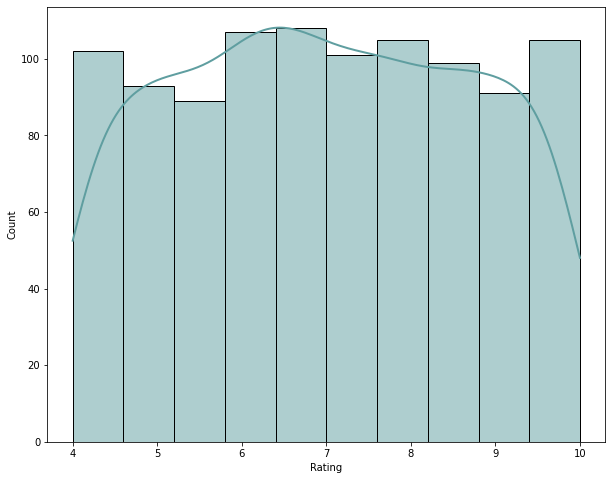

In [6]:

sns.histplot(data = df,
        x = df["Rating"],
        kde = True, 
        color = "cadetblue", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5,
        bins = 10);

El valor de la simetría próximo a 0 nos indica que la distribución es simétrica prácticamente aunque no tenga forma de campana de Gauss.

In [5]:
kurtosistest(df["Rating"])

KurtosistestResult(statistic=-22.71792320140484, pvalue=2.9796608289874047e-114)

Respecto a la curtosis, tenemos un valor que es prácticamente 0 por lo que la curva es mesocúrtica.

In [8]:
stats.shapiro(df["Rating"])

ShapiroResult(statistic=0.9581990838050842, pvalue=2.6858377142073477e-16)

H0 - Los datos tienen una distribución normal
H1 - Los datos no tienen una distribución normal

Dado el pvalue podemos rechazar H0 y por lo tanto nuestra variable respuesta o dependiente no tiene una distribución normal. 

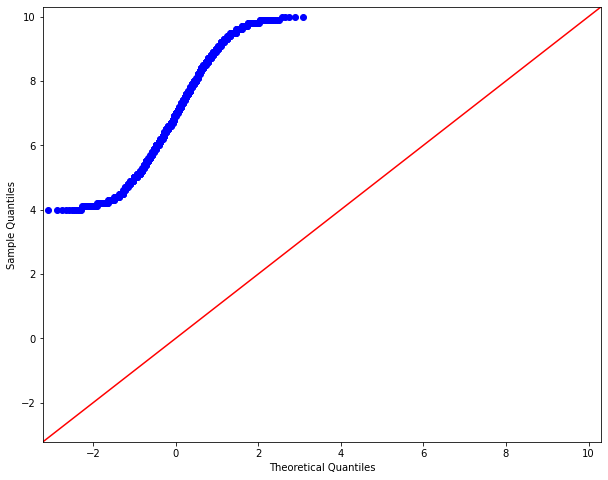

In [11]:
sm.qqplot(df["Rating"], line = "45");

Como hemos ido viendo, la distribución respecto a esta variable es simétrica pero los datos no son normales. 